# Descomposición de una serie temporal
Para comprender mejor las series temporales y sus posibilidades, vamos a profundizar en conceptos fundamentales relacionados a ellas. Se trata de tres conceptos: tendencias, estacionalidad y residuo. La tendencia nos indica el cambio global y si va hacia arriba o abajo. La estacionalidad nos indica patrones periódicos que pueden ser semanales, mensuales, anuales, etc. El residuo es la variación, el ruido o los eventos raros. Para lograr nuestro objetivo utilizaremos una nueva librería: `statsmodels`.

Vamos a analizar una serie de ventas diarias, como en el proyecto anterior.

## Preparación de datos.
Ya lo sabes, `Pandas` y `NumPy` son una gran dupla cuando quieres desarrollar datos y organizarlos de manera tabular. Vamos a simular nuestra serie de ventas diarias.

In [1]:
import pandas as pd
import numpy as np

# Generamos 180 días de ventas.
fechas = pd.date_range('2025-05-01', periods=180)
np.random.seed(22)
tendencia = np.linspace(20, 60, 180)  # Ventas aumentan poco a poco.
estacionalidad = 7 * np.sin(2 * np.pi * fechas.dayofyear / 30)  # Ciclo mensual.
ruido = np.random.normal(0, 5, 180)  # Variabilidad diaria.

ventas = tendencia + estacionalidad + ruido
df = pd.DataFrame({'fecha': fechas, 'ventas': ventas})
df.set_index('fecha', inplace=True)

Ya está hecho. Son los datos de seis meses, con variabilidad diaria, un aumento en ventas y la estacionalidad. Vamos a descomponer los datos con `statsmodels`, pero antes veremos los datos estadísticos de nuestra tabla para conocerla mejor.

In [2]:
# Descripción estadística de los datos.
df.describe()

,ventas
count,180.000000
mean,40.426477
std,13.558230
min,9.738019
25%,28.765589
50%,40.730906
75%,51.449857
max,74.768943


## Descomposición con `statsmodels`

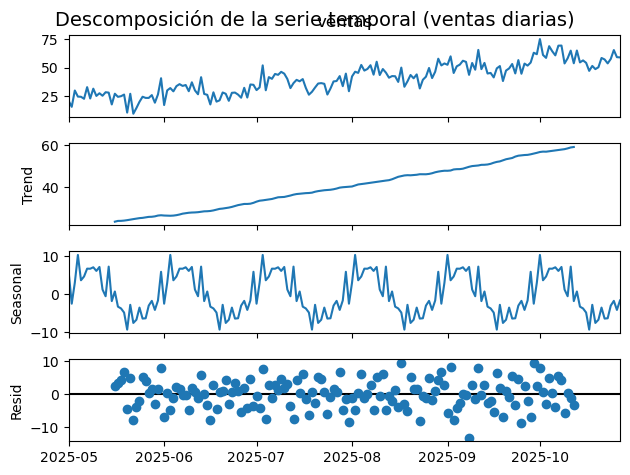

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt 

# Descomponemos la serie temporal
resultado = seasonal_decompose(df['ventas'], model='additive', period=30)

# Graficamos los componentes
resultado.plot()
plt.suptitle('Descomposición de la serie temporal (ventas diarias)', fontsize=14)
plt.show()


Como resultado tenemos tres gráficas separadas en según los componentes clave de los que hablábamos al comienzo:

- _Trend_ es la tendencia, el movimiento global. Las cosas van bien, la tendencia es alcista. La tienda online cada vez vende más.
-  _Seasonal_ es la estacionalidad. En este caso hay patrones cíclicos bien marcados. La ventas suben cada cuatro semanas.
-  _Resid_ es el residuo, que indica los errático, los eventos no esperados. Valores cercanos a cero indican ventas acorde a la tendencia y ciclos. En este caso hay picos de venta positivos y picos de venta negativos, pero no se observa ningún patrón ya que no hay agrupaciones raras. Podemos concluir que hay una variabilidad considerable cada día.

## Conclusión
Con estos tres componentes podemos responder preguntas como: ¿están creciendo las ventas de verdad o sólo se trata de picos estacionales?, ¿cuáles suelen ser las mejores semanas del mes o del año?, ¿fue nuestra última campaña exitosa?, etc.

Así concluimos otro cuaderno exitoso explicando conceptos fundamentales. Aún no sé sobre qué hablaremos en el siguiente proyecto, pero seguiremos con conceptos básicos y útiles, concentrados en la practicidad.